# Linear Regression Predict The Bay Area’s Home Prices

## Data Preprocessing

In [1]:
import pandas as pd 
sf = pd.read_csv('final_data.csv')
sf

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,17615,Address: 149 Laidley Street,San FranciscoSales price: 1950000Sales date: ...,149 Laidley St,2.0,3.0,2100.0,02/03/2016,1950000.0,37.739623,-122.428899,Glen Park,10.0,SingleFamily,1900.0,1895813.0,"1,628,900",94131.0,15184023.0
11326,17619,Address: 737 Tehama Street #1,San FranciscoSales price: 1030000Sales date: ...,737 Tehama St # 1,2.0,2.0,977.0,02/02/2016,1030000.0,37.775184,-122.411567,South of Market,5.0,MultiFamily2To4,2006.0,999443.0,"957,300",94103.0,79845585.0
11327,17623,Address: 319 De Long Street,San FranciscoSales price: 565000Sales date: 0...,319 De Long St,1.0,2.0,875.0,02/02/2016,565000.0,37.709411,-122.465031,Outer Mission,4.0,SingleFamily,1950.0,639167.0,"804,400",94112.0,15196286.0
11328,17624,Address: 1655 48th Avenue,San FranciscoSales price: 762000Sales date: 0...,1655 48th Ave,1.0,2.0,697.0,02/02/2016,762000.0,37.755586,-122.508063,Outer Sunset,4.0,SingleFamily,1904.0,703197.0,"1,030,300",94122.0,15108054.0


In [2]:
col_list = sf.columns.tolist()
col_list

['Unnamed: 0',
 'address',
 'info',
 'z_address',
 'bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsolddate',
 'lastsoldprice',
 'latitude',
 'longitude',
 'neighborhood',
 'totalrooms',
 'usecode',
 'yearbuilt',
 'zestimate',
 'zindexvalue',
 'zipcode',
 'zpid']

In [3]:
#col_list[0,2,3,15,17,18]
print(col_list[0],
      col_list[2],
      col_list[3],
      col_list[15],
      col_list[17],col_list[18])

Unnamed: 0 info z_address zestimate zipcode zpid


In [4]:
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [5]:
sf.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,Address: 1160 Mission Street #2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,"975,700"
1,Address: 260 King Street #475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,"975,700"
2,Address: 560 Missouri Street #B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,"1,277,600"
3,Address: 350 Missouri Street,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,"1,277,600"
4,Address: 3658 Folsom Street,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,"1,248,000"


In [6]:
sf.columns

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue'],
      dtype='object')

In [7]:
sf['zindexvalue']= sf['zindexvalue'].str.replace(',','')
sf['zindexvalue']

0         975700
1         975700
2        1277600
3        1277600
4        1248000
          ...   
11325    1628900
11326     957300
11327     804400
11328    1030300
11329    1214400
Name: zindexvalue, Length: 11330, dtype: object

In [8]:
sf['zindexvalue']= sf['zindexvalue'].astype('float')

In [9]:
sf.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F434F64780>,
      dtype=object)

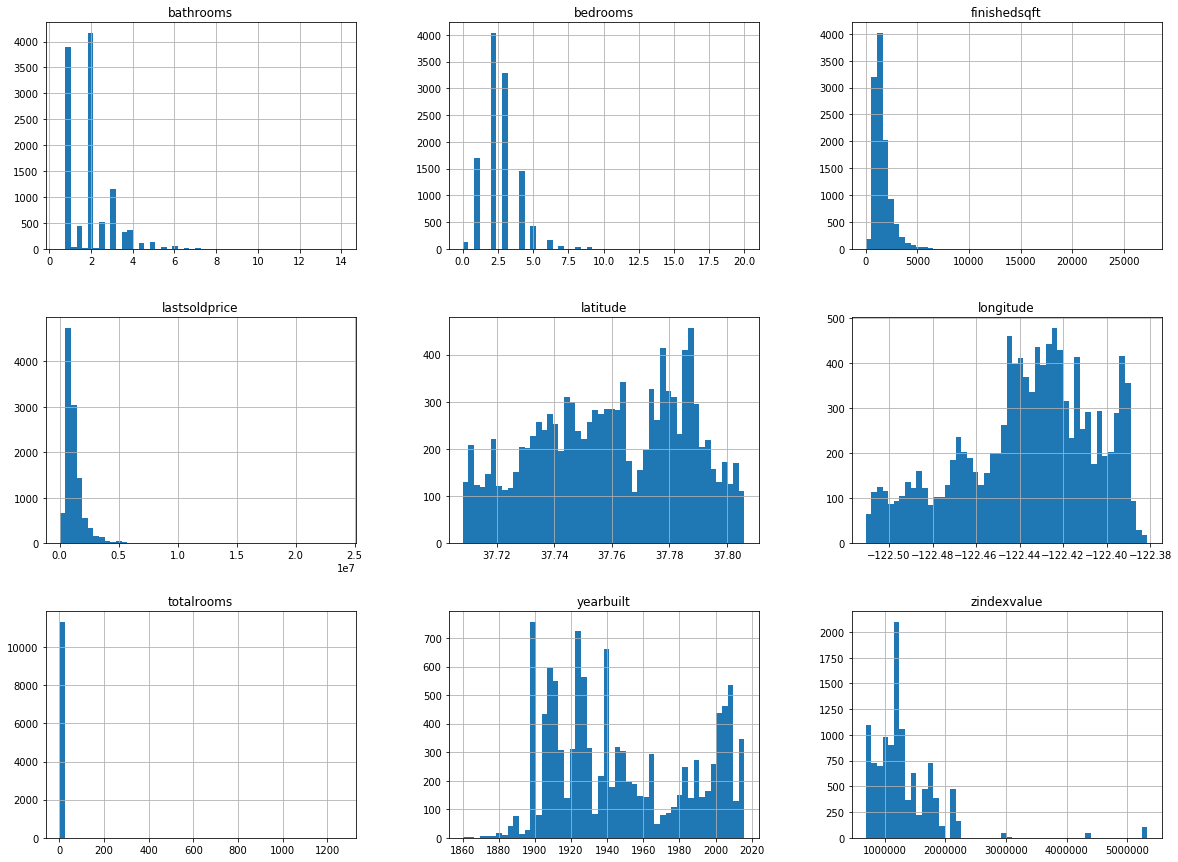

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

sf.hist(bins=50, figsize=(20,15))

In [11]:
sf.columns

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue'],
      dtype='object')

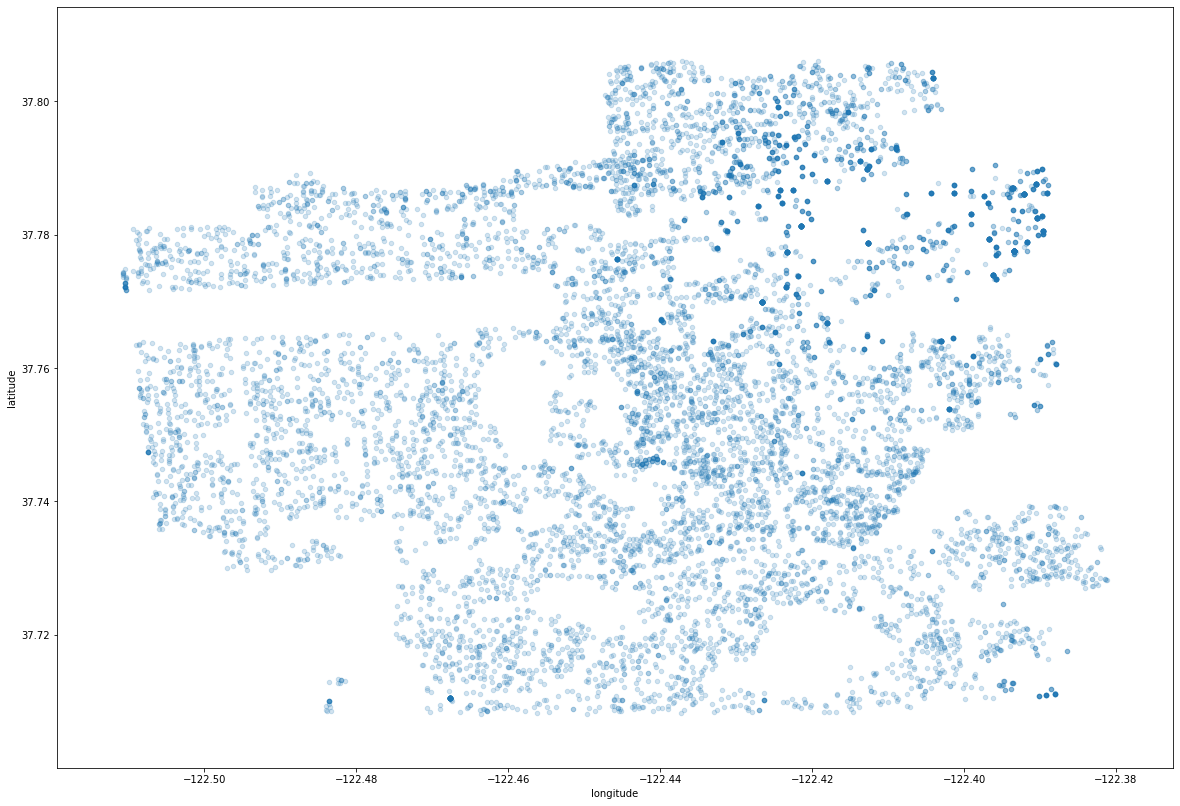

In [12]:
sf.plot(kind='scatter', x="longitude", y="latitude", 
        alpha =0.2, figsize = (20,14))


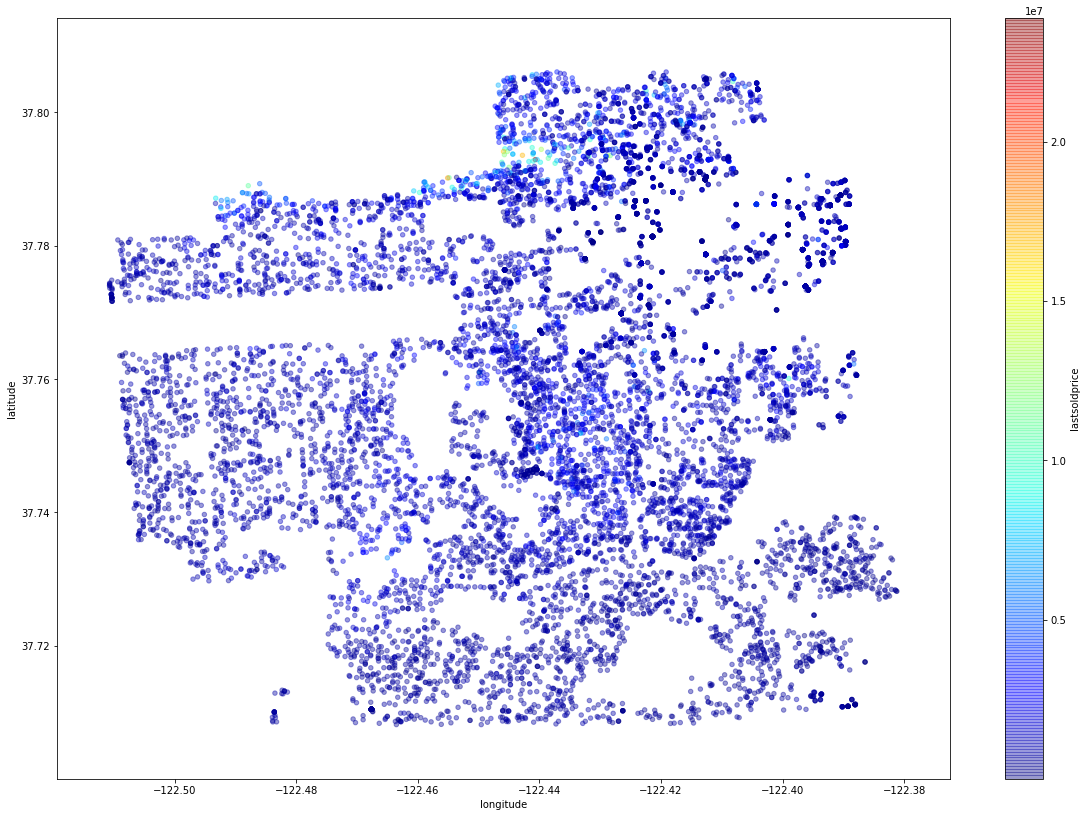

In [13]:
sf.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(20,14),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [14]:
corr_matrix = sf.corr()
corr_matrix

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
bathrooms,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.249193
bedrooms,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.164981
finishedsqft,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.338131
lastsoldprice,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.460429
latitude,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.393080
longitude,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.188348
totalrooms,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.043554
yearbuilt,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.219629
zindexvalue,0.249193,0.164981,0.338131,0.460429,0.393080,-0.188348,0.043554,-0.219629,1.000000


In [15]:
sf.columns

Index(['address', 'bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue'],
      dtype='object')

In [16]:
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

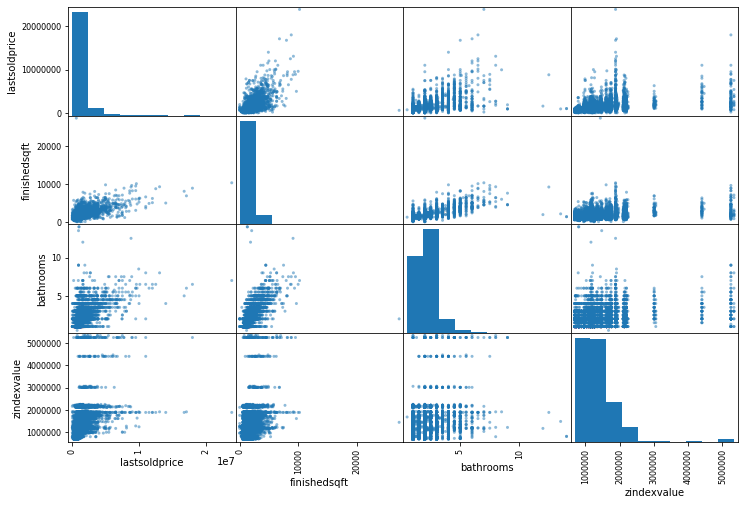

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["lastsoldprice", "finishedsqft", "bathrooms", "zindexvalue"]
scatter_matrix(sf[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

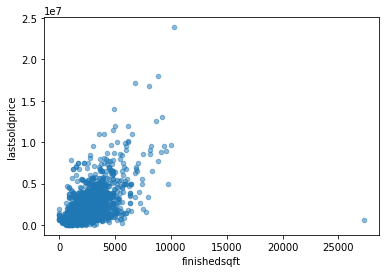

In [18]:
sf.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)

In [19]:
sf['price_per_sqft'] = sf['lastsoldprice']/sf['finishedsqft']
corr_matrix = sf.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

In [20]:
sf['neighborhood']

0        South of Market
1        South of Market
2           Potrero Hill
3           Potrero Hill
4         Bernal Heights
              ...       
11325          Glen Park
11326    South of Market
11327      Outer Mission
11328       Outer Sunset
11329     Bernal Heights
Name: neighborhood, Length: 11330, dtype: object

In [21]:
sf['neighborhood'].value_counts()

Mission             540
Bernal Heights      525
South of Market     524
South Beach         461
Pacific Heights     439
                   ... 
North Beach          31
Lakeside             29
Little Hollywood     12
North Waterfront      8
Daly City             3
Name: neighborhood, Length: 71, dtype: int64

In [22]:
freq = sf.groupby('neighborhood').count()['address']
mean = sf.groupby('neighborhood').mean()['price_per_sqft']
cluster = pd.concat([freq, mean], axis=1)

cluster

,address,price_per_sqft
neighborhood,,
Bayview,354,417.049058
Bernal Heights,525,3158.199830
Buena Vista Park,70,952.912618
Central Richmond,227,659.691461
Central Sunset,229,610.067525
...,...,...
West Portal,43,707.303289
Western Addition,107,605.223562
Westwood Highlands,56,697.829959


In [23]:
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster.describe()

,freq,price_per_sqft
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


In [24]:
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
cluster

,freq,price_per_sqft,neighborhood
neighborhood,,,
Bayview,354,417.049058,Bayview
Bernal Heights,525,3158.199830,Bernal Heights
Buena Vista Park,70,952.912618,Buena Vista Park
Central Richmond,227,659.691461,Central Richmond
Central Sunset,229,610.067525,Central Sunset
...,...,...,...
West Portal,43,707.303289,West Portal
Western Addition,107,605.223562,Western Addition
Westwood Highlands,56,697.829959,Westwood Highlands


In [25]:
cluster1 = cluster[cluster.price_per_sqft < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

In [26]:
cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

In [27]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

In [28]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
sf['group'] = sf.neighborhood.apply(get_group)
sf.group

0        high_price_high_freq
1        high_price_high_freq
2        high_price_high_freq
3        high_price_high_freq
4        high_price_high_freq
                 ...         
11325    high_price_high_freq
11326    high_price_high_freq
11327               low_price
11328               low_price
11329    high_price_high_freq
Name: group, Length: 11330, dtype: object

In [29]:
sf.drop(sf.columns[[0, 4, 6, 7, 8, 13]], axis=1, inplace=True)
sf = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt','zindexvalue', 'group', 'lastsoldprice']]
sf.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2.0,1043.0,4.0,Condominium,2007.0,975700.0,high_price_high_freq,1300000.0
1,1.0,1.0,903.0,3.0,Condominium,2004.0,975700.0,high_price_high_freq,750000.0
2,4.0,3.0,1425.0,6.0,Condominium,2003.0,1277600.0,high_price_high_freq,1495000.0
3,3.0,3.0,2231.0,10.0,SingleFamily,1927.0,1277600.0,high_price_high_freq,2700000.0
4,3.0,3.0,1300.0,4.0,SingleFamily,1900.0,1248000.0,high_price_high_freq,1530000.0


In [30]:
X = sf[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 
         'zindexvalue', 'group']]
Y = sf['lastsoldprice']

n = pd.get_dummies(sf.group)
X = pd.concat([X, n], axis=1)
m = pd.get_dummies(sf.usecode)
X = pd.concat([X, m], axis=1)
drops = ['group', 'usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,high_price_high_freq,high_price_low_freq,low_price,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse
0,2.0,2.0,1043.0,4.0,2007.0,975700.0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,1.0,903.0,3.0,2004.0,975700.0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4.0,3.0,1425.0,6.0,2003.0,1277600.0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,3.0,3.0,2231.0,10.0,1927.0,1277600.0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.0,3.0,1300.0,4.0,1900.0,1248000.0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Train and Build a Linear Regression Model

In [32]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.5619


In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 616071.5748


In [35]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 363742.1631


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [37]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.6534


In [38]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 547976.0400


## Gradient boosting

In [39]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.6613


In [41]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 541723.1111


## Feature Importance

In [42]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Apartment-0.00%
MultiFamily5Plus-0.00%
Mobile-0.00%
Miscellaneous-0.00%
Cooperative-0.00%
Townhouse-0.00%
Condominium-0.10%
high_price_low_freq-0.13%
Duplex-0.15%
MultiFamily2To4-0.28%
bedrooms-0.44%
high_price_high_freq-0.98%
yearbuilt-1.17%
totalrooms-2.31%
SingleFamily-5.19%
low_price-6.08%
bathrooms-13.23%
zindexvalue-17.79%
finishedsqft-52.15%
